In [ ]:
import pandas as pd

In [ ]:
# Read the CSV to a Dataframe
crime_df = pd.read_csv("/content/index-crimes-by-county-and-agency-beginning-1990.csv")

In [ ]:
crime_df

,County,Agency,Year,Months Reported,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft,Region
0,Albany,Albany City PD,2018,12.0,3968.0,822.0,12.0,51.0,209.0,550.0,3146.0,432.0,2584.0,130.0,Non-New York City
1,Albany,Albany County Park PD,2018,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Non-New York City
2,Albany,Albany County Sheriff,2018,12.0,130.0,16.0,0.0,6.0,0.0,10.0,114.0,19.0,82.0,13.0,Non-New York City
3,Albany,Albany County State Police,2018,12.0,158.0,30.0,0.0,25.0,0.0,5.0,128.0,5.0,121.0,2.0,Non-New York City
4,Albany,Altamont Vg PD,2018,12.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,6.0,0.0,Non-New York City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,Yates,County Total,1990,NaN,507.0,34.0,0.0,5.0,0.0,29.0,473.0,104.0,361.0,8.0,Non-New York City
19952,Yates,Penn Yan Vg PD,1990,NaN,142.0,3.0,0.0,1.0,0.0,2.0,139.0,11.0,123.0,5.0,Non-New York City
19953,Yates,Yates County Park PD,1990,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Non-New York City
19954,Yates,Yates County Sheriff,1990,NaN,318.0,29.0,0.0,4.0,0.0,25.0,289.0,84.0,202.0,3.0,Non-New York City


**Data Pre-Processing Cleaning**

In [ ]:
# Find out which Columns have NaN which is only Months Reported
# Is na for all of 2001 - 1990
crime_df.loc[:, crime_df.isna().any()]

,Months Reported,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
0,12.0,3968.0,822.0,12.0,51.0,209.0,550.0,3146.0,432.0,2584.0,130.0
1,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,12.0,130.0,16.0,0.0,6.0,0.0,10.0,114.0,19.0,82.0,13.0
3,12.0,158.0,30.0,0.0,25.0,0.0,5.0,128.0,5.0,121.0,2.0
4,12.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19951,NaN,507.0,34.0,0.0,5.0,0.0,29.0,473.0,104.0,361.0,8.0
19952,NaN,142.0,3.0,0.0,1.0,0.0,2.0,139.0,11.0,123.0,5.0
19953,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
19954,NaN,318.0,29.0,0.0,4.0,0.0,25.0,289.0,84.0,202.0,3.0


In [ ]:
# Unique Years 
years = pd.unique(crime_df['Year']).tolist()

In [ ]:
years

[2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000,
 1999,
 1998,
 1997,
 1996,
 1995,
 1994,
 1993,
 1992,
 1991,
 1990]

In [ ]:
len(years)

29

In [ ]:
# Replace the NaN values with the population mean from the Months Reported column
reported_mean = crime_df['Months Reported'].mean()
crime_df['Months Reported'].fillna(value=reported_mean, inplace=True)
crime_df

,County,Agency,Year,Months Reported,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft,Region
0,Albany,Albany City PD,2018,12.000000,3968.0,822.0,12.0,51.0,209.0,550.0,3146.0,432.0,2584.0,130.0,Non-New York City
1,Albany,Albany County Park PD,2018,7.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Non-New York City
2,Albany,Albany County Sheriff,2018,12.000000,130.0,16.0,0.0,6.0,0.0,10.0,114.0,19.0,82.0,13.0,Non-New York City
3,Albany,Albany County State Police,2018,12.000000,158.0,30.0,0.0,25.0,0.0,5.0,128.0,5.0,121.0,2.0,Non-New York City
4,Albany,Altamont Vg PD,2018,12.000000,7.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,6.0,0.0,Non-New York City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19951,Yates,County Total,1990,11.727995,507.0,34.0,0.0,5.0,0.0,29.0,473.0,104.0,361.0,8.0,Non-New York City
19952,Yates,Penn Yan Vg PD,1990,11.727995,142.0,3.0,0.0,1.0,0.0,2.0,139.0,11.0,123.0,5.0,Non-New York City
19953,Yates,Yates County Park PD,1990,11.727995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Non-New York City
19954,Yates,Yates County Sheriff,1990,11.727995,318.0,29.0,0.0,4.0,0.0,25.0,289.0,84.0,202.0,3.0,Non-New York City


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Rape')

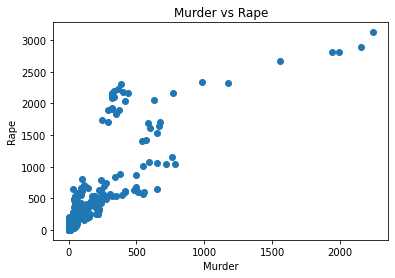

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(crime_df['Murder'], crime_df['Rape'])
# set a title and labels
ax.set_title('Murder vs Rape')
ax.set_xlabel('Murder')
ax.set_ylabel('Rape')

In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

In [ ]:
df2 = crime_df[['Robbery', 'Region']]
df2

,Robbery,Region
0,209.0,Non-New York City
1,0.0,Non-New York City
2,0.0,Non-New York City
3,0.0,Non-New York City
4,0.0,Non-New York City
...,...,...
19951,0.0,Non-New York City
19952,0.0,Non-New York City
19953,0.0,Non-New York City
19954,0.0,Non-New York City


In [ ]:
df = crime_df[['Year', 'Months Reported']]

In [ ]:
# Example of getting the mean for 2018 Months Reported
df.loc[df['Year'] == 2018].mean()
df.loc[df['Year'] == 2018]['Months Reported'].mean()

11.68760907504363

In [ ]:
# Get all the Months Reported Mean for all the Years
years_mean = []
for i in range(0, 29):
  years_mean.append(df.loc[df['Year'] == years[i]]['Months Reported'].mean())

In [ ]:
df2 = df.loc[df['Year'] == 2018]
df2['Months Reported'].fillna(value=years_mean[0], inplace=True)
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Year,Months Reported
0,2018,12.000000
1,2018,7.000000
2,2018,12.000000
3,2018,12.000000
4,2018,12.000000
...,...,...
625,2018,12.000000
626,2018,11.687609
627,2018,12.000000
628,2018,12.000000


In [ ]:
print("Year")
print("Mean")
print(crime_df['Year'].mean())
print("Min")
print(crime_df['Year'].min())
print("Max")
print(crime_df['Year'].max())
print("Standard Dev.")
print(crime_df['Year'].std())

Year
Mean
2003.7452395269593
Min
1990
Max
2018
Standard Dev.
8.301976645610228


In [ ]:
print("Index Total")
print("Mean")
print(crime_df['Index Total'].mean())
print("Min")
print(crime_df['Index Total'].min())
print("Max")
print(crime_df['Index Total'].max())
print("Standard Dev.")
print(crime_df['Index Total'].std())

Index Total
Mean
1982.2288473329245
Min
0.0
Max
711556.0
Standard Dev.
17829.775011585887


In [ ]:
print("Months Reported")
print("Mean")
print(crime_df['Months Reported'].mean())
print("Min")
print(crime_df['Months Reported'].min())
print("Max")
print(crime_df['Months Reported'].max())
print("Standard Dev.")
print(crime_df['Months Reported'].std())

Months Reported
Mean
11.72799470549305
Min
0.0
Max
24.0
Standard Dev.
1.2256435015407745
